In [83]:
#standard ds imports
import pandas as pd
import numpy as np
from pydataset import data


#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

import env
import wrangle

from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1

## Load the tips dataset.

    - Create a column named price_per_person. This should be the total bill divided by the party size.


In [84]:
from pydataset import data # acquire the data from pydataset
tips = data('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [85]:
tips['price_per_person'] = tips['total_bill'] / tips['size'] # create new column 

tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333


In [86]:
tips.time.value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [87]:
dummy_df = pd.get_dummies(tips[['sex','smoker', 'day', 'time']], drop_first=True).astype(int)

tips = pd.concat([tips, dummy_df], axis=1)

tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000,0,0,0,1,0,0
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667,1,0,0,1,0,0
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333,1,0,0,1,0,0


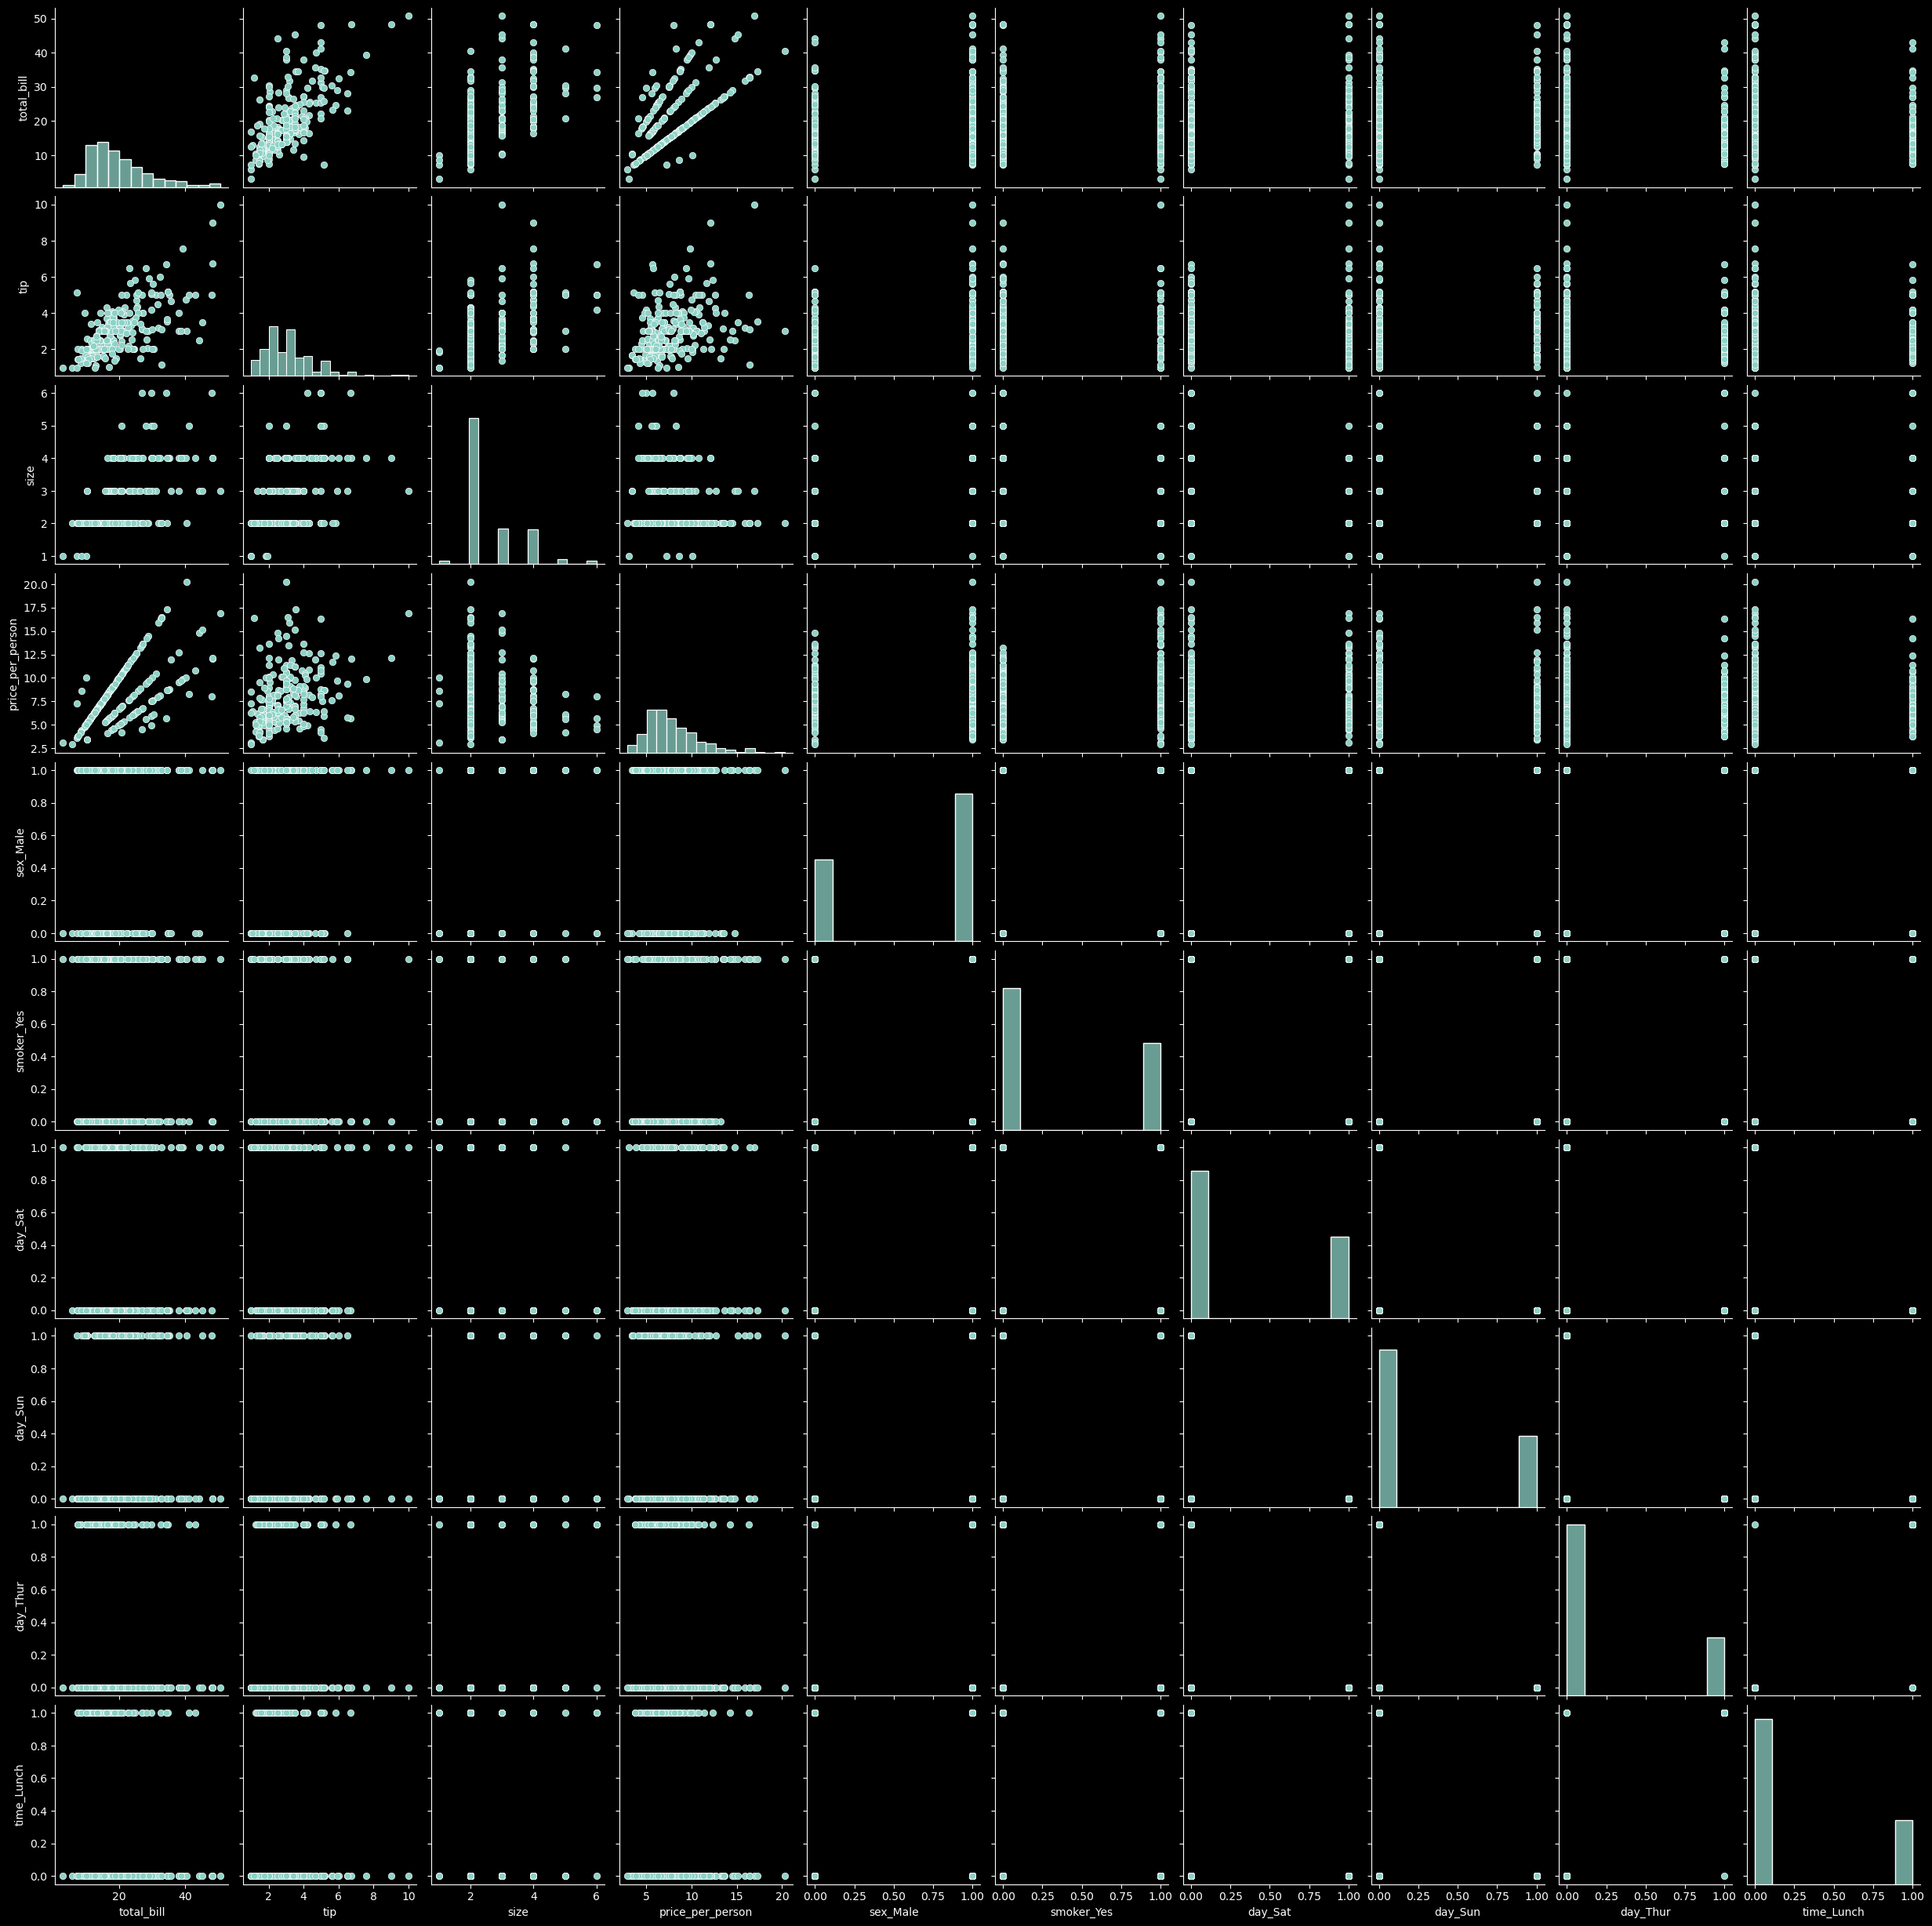

In [88]:
sns.pairplot(data=tips)

In [89]:
def split_data(df): 
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate,
                                       test_size=.3,
                                       random_state=123)
    return train, validate, test

In [90]:
train, validate, test = split_data(tips) # split data 


print(f'train    -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test     -> {test.shape}')

train    -> (136, 14)
validate -> (59, 14)
test     -> (49, 14)


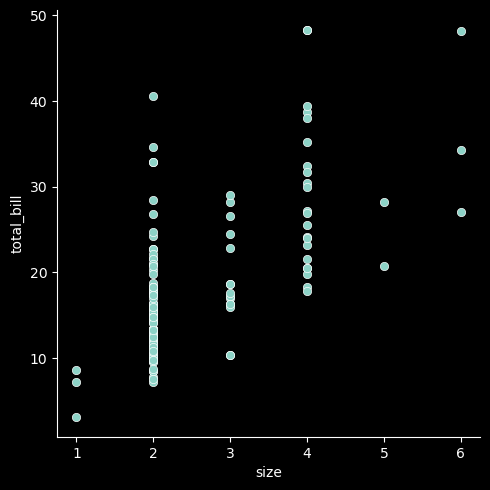

In [91]:
sns.relplot(data=train, y='total_bill', x='size')

In [92]:
# X and y splits to scale
target = "tip"

X_train = train[['total_bill', 'size', 'price_per_person']]
y_train = train[target]

X_validate = validate[['total_bill', 'size', 'price_per_person']]
y_validate = validate[target]

X_test = test[['total_bill', 'size', 'price_per_person']]
y_test = test[target]

In [93]:
# now that our data is split we can scale it

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

mms = MinMaxScaler() # creeating the scaler 
ss = StandardScaler() # creating the scaler
rs = RobustScaler() # creating the scaler 

mms.fit(X_train) # fitting and transforming the scaler to area


MinMaxScaler()

In [94]:
#use it
#make a new column within train
#use 'transform' instead of 'predict'
X_train_scaled = mms.transform(X_train)
X_validate_scaled = mms.transform(X_validate)
X_test_scaled = mms.transform(X_test)


In [95]:
train.head(1)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
19,16.97,3.5,Female,No,Sun,Dinner,3,5.656667,0,0,0,1,0,0


In [96]:
X_train.head(3) # verify 

,total_bill,size,price_per_person
19,16.97,3,5.656667
173,7.25,2,3.625000
119,12.43,2,6.215000


In [97]:
y_train.head(3) # verity 

19     3.50
173    5.15
119    1.80
Name: tip, dtype: float64

    - Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?


In [98]:
# total bill, price per person, and size

    - Use Select K Best to select the top 2 features for predicting tip amount. What are they?


In [99]:
from sklearn.feature_selection import SelectKBest, f_regression # imports 

In [100]:
f_selector = SelectKBest(f_regression, k='all') # Initialize the f-selector 

In [101]:
f_selector.fit(X_train, y_train) # fit the f-selector 

SelectKBest(k='all', score_func=<function f_regression at 0x161264b80>)

In [102]:
X_reduced = f_selector.transform(X_train)

print(X_train.shape)
print(X_reduced.shape)


(136, 3)
(136, 3)


In [103]:
f_support = f_selector.get_support()

print(f_support) 


[ True  True  True]


In [104]:
f_feature = X_train.loc[:,f_support].columns.tolist()

# you could also get the list this way (among many others)
# f_feature = [X_train.columns.values[i] for i in range(len(feature_mask)) if feature_mask[i]==True]

print(str(len(f_feature)), 'selected features')
print(f_feature)


3 selected features
['total_bill', 'size', 'price_per_person']


    - Use Recursive Feature Elimination to select the top 2 features for tip amount. What are they?


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [106]:
lm = LinearRegression()

In [107]:
rfe = RFE(lm, n_features_to_select=5)

In [108]:
# Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  

In [109]:
#Fitting the data to model
lm.fit(X_rfe,y_train)

LinearRegression()

In [110]:
mask = rfe.support_

In [111]:
rfe_features = X_train.loc[:,mask].columns.tolist()

In [112]:
print(str(len(rfe_features)), 'selected features')
print(rfe_features)

3 selected features
['total_bill', 'size', 'price_per_person']


In [113]:
var_ranks = rfe.ranking_
var_names = X_train.columns.tolist()

pd.DataFrame({'Var': var_names, 'Rank': var_ranks})

,Var,Rank
0,total_bill,1
1,size,1
2,price_per_person,1


    - Why do you think Select K Best and Recursive Feature Elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?

In [114]:
print(f_feature)
print(rfe_features)

['total_bill', 'size', 'price_per_person']
['total_bill', 'size', 'price_per_person']


In [115]:
# List did not match up untill I asked for more features 

# Select K best and Recursive Feature Elimination are evaluating the best features 

# 2 

Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. 

Test your function with the tips dataset. 

You should see the same results as when you did the process manually.



In [116]:
def select_kbest(x, y, f_num): # returns strings 
    f_selector = SelectKBest(f_regression, k=f_num) # Initialize the f-selector 
    f_selector.fit(x, y) # fit the f-selector 
    X_reduced = f_selector.transform(x)
    f_support = f_selector.get_support()
    f_feature = x.loc[:,f_support].columns.tolist()
    print(str(len(f_feature)), 'selected features')
    print(f_feature)

In [117]:
select_kbest(X_train, y_train, 3)

3 selected features
['total_bill', 'size', 'price_per_person']


# 3 

Write a function named rfe that takes in the predictors, the target, and the number of features to select. 

It should return the top n features based on the RFE class. 

Test your function with the tips dataset. 

You should see the same results as when you did the process manually.



In [118]:
def rfe(x, y, f_num):
    lm = LinearRegression()
    rfe = RFE(lm, n_features_to_select=f_num)
    X_rfe = rfe.fit_transform(x,y)  
    lm.fit(X_rfe,y)
    mask = rfe.support_
    rfe_features = x.loc[:,mask].columns.tolist()
    print(str(len(rfe_features)), 'selected features')
    print(rfe_features)
    var_ranks = rfe.ranking_
    var_names = x.columns.tolist()
    pd.DataFrame({'Var': var_names, 'Rank': var_ranks})
    

In [119]:
rfe(X_train, y_train, 3)

3 selected features
['total_bill', 'size', 'price_per_person']


# 4 

Load the swiss dataset and use all the other features to predict Fertility. 

Find the top 3 features using both Select K Best and Recursive Feature Elimination (use the functions you just built to help you out).



In [120]:
from pydataset import data
swiss = data('swiss')
swiss.head(3)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2


In [121]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [122]:
train, validate, test = split_data(swiss) # split data 


print(f'train    -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test     -> {test.shape}')

train    -> (25, 6)
validate -> (12, 6)
test     -> (10, 6)


In [123]:
# first split into my X_train and y_train
X_train = train[['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']]
y_train = train.Fertility

X_validate = validate[['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']]
y_validate = validate.Fertility

X_test = test[['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']]
y_test = test.Fertility

In [124]:
select_kbest(X_train, y_train, 3)

3 selected features
['Examination', 'Catholic', 'Infant.Mortality']


In [125]:
rfe(X_train, y_train, 3)

3 selected features
['Agriculture', 'Examination', 'Infant.Mortality']
